# DNN Lab

## Objectives
-  Understand basic DNN model building process using Keras
-  Analyze model performance and capacity vs generalization tradeoff
-  Modify models to reduce overfitting and improve performance

## Exercises
-  Build a DNN model for slump Test Problem
-  Start with a model consisting of one hidden layer with 7 neurons
-  Analyze results and explore improvements to model in terms of capacity, regularization





### Step 1: Import Libraries

In [1]:
%tensorflow_version 2.x
from numpy.random import seed
seed(2)
import tensorflow as tf
from tensorflow import keras
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.python.data import Dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
print(tf.__version__)

2.6.0


### Step 2: Import Data

In [2]:

pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

LiverData = pd.read_csv("hcvdat0.csv", sep=",")



In [3]:
LiverData.describe()

,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.0,615.0,614.0,597.0,614.0,615.0,615.0,615.0,605.0,615.0,615.0,614.0
mean,308.0,47.4,41.6,68.3,28.5,34.8,11.4,8.2,5.4,81.3,39.5,72.0
std,177.7,10.1,5.8,26.0,25.5,33.1,19.7,2.2,1.1,49.8,54.7,5.4
min,1.0,19.0,14.9,11.3,0.9,10.6,0.8,1.4,1.4,8.0,4.5,44.8
25%,154.5,39.0,38.8,52.5,16.4,21.6,5.3,6.9,4.6,67.0,15.7,69.3
50%,308.0,47.0,42.0,66.2,23.0,25.9,7.3,8.3,5.3,77.0,23.3,72.2
75%,461.5,54.0,45.2,80.1,33.1,32.9,11.2,9.6,6.1,88.0,40.2,75.4
max,615.0,77.0,82.2,416.6,325.3,324.0,254.0,16.4,9.7,1079.1,650.9,90.0


### Step 3: Preprocess

In [4]:
LiverData.drop(['Unnamed: 0'], axis=1, inplace=True)
LiverData.drop(LiverData[LiverData['Category']=='0s=suspect Blood Donor'].index, inplace=True)
LiverData.replace(to_replace={'f':1, 'm':0}, inplace=True)

In [5]:
LiverData.isna().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
            ..
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
Length: 13, dtype: int64

In [6]:
LiverData[['Category', 'ALP']].groupby('Category').mean()

,ALP
Category,
0=Blood Donor,68.4
1=Hepatitis,42.1
2=Fibrosis,37.8
3=Cirrhosis,93.2


In [7]:
#LiverData[LiverData['Category']=='0=Blood Donor']]
LiverData.loc[LiverData.Category=='0=Blood Donor', 'ALP'] = LiverData.loc[LiverData.Category=='0=Blood Donor', 'ALP'].fillna(68.4)
LiverData.loc[LiverData.Category=='1=Hepatitis', 'ALP'] = LiverData.loc[LiverData.Category=='1=Hepatitis', 'ALP'].fillna(42.1)
LiverData.loc[LiverData.Category=='2=Fibrosis', 'ALP'] = LiverData.loc[LiverData.Category=='2=Fibrosis', 'ALP'].fillna(37.8)
LiverData.loc[LiverData.Category=='3=Cirrhosis', 'ALP'] = LiverData.loc[LiverData.Category=='3=Cirrhosis', 'ALP'].fillna(93.2)

#LiverData[['Category', 'ALP']]

In [8]:
df2 = LiverData.dropna()

In [9]:
LiverData['Category'].value_counts()

0=Blood Donor    533
3=Cirrhosis       30
1=Hepatitis       24
2=Fibrosis        21
Name: Category, dtype: int64

In [10]:
df2['Category'].value_counts()

0=Blood Donor    526
3=Cirrhosis       28
1=Hepatitis       23
2=Fibrosis        20
Name: Category, dtype: int64

In [11]:
del df2
LiverData.dropna(inplace=True)

In [12]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [13]:
LiverData.head(5)

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,0,38.5,52.5,7.7,22.1,7.5,6.9,3.2,106.0,12.1,69.0
1,0=Blood Donor,32,0,38.5,70.3,18.0,24.7,3.9,11.2,4.8,74.0,15.6,76.5
2,0=Blood Donor,32,0,46.9,74.7,36.2,52.6,6.1,8.8,5.2,86.0,33.2,79.3
3,0=Blood Donor,32,0,43.2,52.0,30.6,22.6,18.9,7.3,4.7,80.0,33.8,75.7
4,0=Blood Donor,32,0,39.2,74.1,32.6,24.8,9.6,9.2,4.3,76.0,29.9,68.7


In [14]:
LiverData.dtypes

Category     object
Age           int64
Sex           int64
ALB         float64
ALP         float64
ALT         float64
AST         float64
BIL         float64
CHE         float64
CHOL        float64
CREA        float64
GGT         float64
PROT        float64
dtype: object

In [15]:
LiverData.shape


(597, 13)

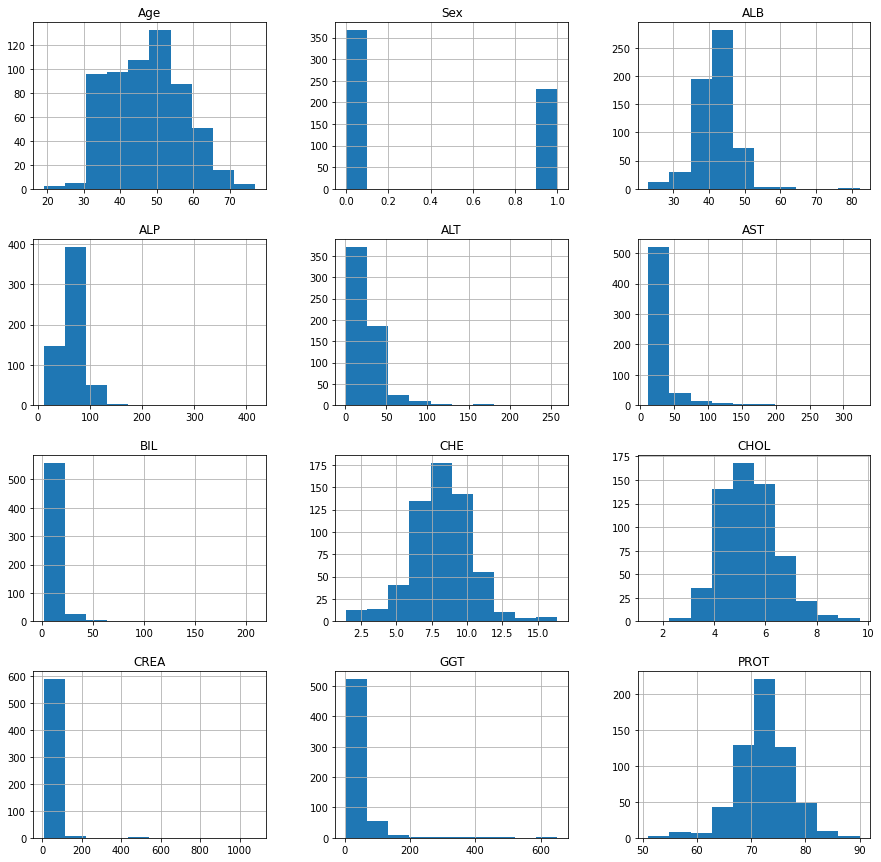

In [16]:
%matplotlib inline
LiverData.hist(figsize=(15,15))
plt.show()

In [17]:
LiverData["Category"] = LiverData["Category"].astype('category')
LiverData["ClassNum"] = LiverData["Category"].cat.codes
LDataEncoded = pd.get_dummies(LiverData, columns=['Category'])

In [18]:
LDataEncoded.head(5)

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,ClassNum,Category_0=Blood Donor,Category_1=Hepatitis,Category_2=Fibrosis,Category_3=Cirrhosis
0,32,0,38.5,52.5,7.7,22.1,7.5,6.9,3.2,106.0,12.1,69.0,0,1,0,0,0
1,32,0,38.5,70.3,18.0,24.7,3.9,11.2,4.8,74.0,15.6,76.5,0,1,0,0,0
2,32,0,46.9,74.7,36.2,52.6,6.1,8.8,5.2,86.0,33.2,79.3,0,1,0,0,0
3,32,0,43.2,52.0,30.6,22.6,18.9,7.3,4.7,80.0,33.8,75.7,0,1,0,0,0
4,32,0,39.2,74.1,32.6,24.8,9.6,9.2,4.3,76.0,29.9,68.7,0,1,0,0,0


In [19]:
LDataEncoded.shape

(597, 17)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(LDataEncoded.iloc[:, 0:12], LDataEncoded.iloc[:, 13:17], test_size=0.2, stratify=LDataEncoded.iloc[:, 13:17])

In [ ]:
X_train.head(5)

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
89,39,0,46.4,102.9,44.4,26.2,4.1,9.3,8.9,103.0,64.0,72.2
313,70,0,41.0,63.5,16.9,21.6,5.9,6.0,4.7,83.0,13.5,73.7
3,32,0,43.2,52.0,30.6,22.6,18.9,7.3,4.7,80.0,33.8,75.7
386,43,1,33.7,57.5,15.1,24.8,6.9,7.9,5.4,71.0,46.0,68.4
470,52,1,36.7,87.6,34.3,30.8,17.7,10.1,7.0,72.0,24.2,66.3


In [21]:
y_train.apply(pd.value_counts)

,Category_0=Blood Donor,Category_1=Hepatitis,Category_2=Fibrosis,Category_3=Cirrhosis
0,57,458,461,455
1,420,19,16,22


In [22]:
y_test.apply(pd.value_counts)

,Category_0=Blood Donor,Category_1=Hepatitis,Category_2=Fibrosis,Category_3=Cirrhosis
0,14,116,116,114
1,106,4,4,6


In [23]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

In [24]:
X_train.columns

Index(['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA',
       'GGT', 'PROT'],
      dtype='object')

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
def preprocess(X_train, X_test, y_train, y_test) :
    ctx = ColumnTransformer(
        [("norm1", StandardScaler(), ['Age', 'ALB', 'CHE', 'CHOL', 'PROT']),
         ("powerx", PowerTransformer(method='yeo-johnson', standardize=True), ['ALP', 'ALT', 'AST', 'BIL', 'CREA', 'GGT'] ),
        ], remainder = 'passthrough')
    # fit the transformer on training data
    xscaler = ctx.fit(X_train)
    # transform train and test based on train parameters
    scaledf1 = xscaler.transform(X_train)
    scaledf2 = xscaler.transform(X_test)
    # get column names

    xcolnames = ['Age ', 'ALB', 'CHE', 'CHOL', 'PROT','ALP', 'ALT', 'AST', 'BIL', 'CREA', 'GGT', 'Sex']

    # create train test dataframes for x variables
    X_train = pd.DataFrame(scaledf1, index=X_train.index, columns=xcolnames)
    X_test = pd.DataFrame(scaledf2, index=X_test.index, columns=xcolnames)

    # Build and transform y variables

    return X_train, X_test, y_train, y_test


In [26]:
X_train, X_test, y_train, y_test = preprocess(X_train, X_test, y_train, y_test)

In [27]:
X_train.head(5)

,Age,ALB,CHE,CHOL,PROT,ALP,ALT,AST,BIL,CREA,GGT,Sex
89,-0.8,0.8,0.5,3.1,-0.1,1.4,1.1,0.1,-1.1,1.3,1.2,0.0
313,2.3,-0.2,-1.0,-0.6,0.2,-0.0,-0.5,-0.6,-0.4,0.4,-1.0,0.0
3,-1.5,0.2,-0.4,-0.6,0.7,-0.6,0.5,-0.4,1.3,0.2,0.5,0.0
386,-0.4,-1.5,-0.1,-0.0,-0.9,-0.3,-0.7,-0.1,-0.1,-0.4,0.8,1.0
470,0.5,-1.0,0.9,1.4,-1.3,0.9,0.7,0.5,1.2,-0.3,0.0,1.0


In [28]:
# Double-check that we've done the right thing.
print("Training examples summary:")
display.display(X_train.describe())
print("Validation examples summary:")
display.display(X_test.describe())

print("Training targets summary:")
display.display(y_train.apply(pd.value_counts))
print("Validation targets summary:")
#display.display(y_test.describe())
display.display(y_test.apply(pd.value_counts))

Training examples summary:


,Age,ALB,CHE,CHOL,PROT,ALP,ALT,AST,BIL,CREA,GGT,Sex
count,477.0,477.0,477.0,477.0,477.0,477.0,477.0,477.0,477.0,477.0,477.0,477.0
mean,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.4
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
min,-2.8,-3.5,-3.2,-2.6,-4.5,-4.7,-3.8,-3.4,-3.0,-4.5,-3.5,0.0
25%,-0.8,-0.5,-0.6,-0.7,-0.6,-0.6,-0.5,-0.6,-0.6,-0.6,-0.7,0.0
50%,-0.0,0.0,0.0,-0.1,-0.0,0.0,-0.1,-0.0,-0.1,0.1,-0.1,0.0
75%,0.7,0.6,0.6,0.6,0.7,0.6,0.6,0.6,0.6,0.7,0.7,1.0
max,3.0,7.5,3.8,3.8,3.6,6.0,4.3,2.4,2.9,4.3,2.5,1.0


Validation examples summary:


,Age,ALB,CHE,CHOL,PROT,ALP,ALT,AST,BIL,CREA,GGT,Sex
count,120.0,120.0,120.0,120.0,120.0,120.0,120.0,120.0,120.0,120.0,120.0,120.0
mean,0.1,-0.1,-0.0,-0.1,-0.3,0.0,0.1,0.2,0.0,-0.3,-0.1,0.3
std,1.0,0.9,1.0,0.9,1.1,0.9,1.0,0.9,1.0,4.0,0.9,0.5
min,-1.5,-2.9,-3.1,-3.5,-4.0,-2.5,-4.0,-1.8,-2.5,-42.8,-2.4,0.0
25%,-0.8,-0.6,-0.6,-0.8,-0.8,-0.7,-0.4,-0.4,-0.6,-0.6,-0.8,0.0
50%,0.2,-0.0,-0.0,-0.1,-0.2,0.2,0.1,0.2,0.1,0.1,-0.1,0.0
75%,0.7,0.6,0.6,0.6,0.4,0.7,0.6,0.6,0.7,0.7,0.5,1.0
max,2.9,1.7,3.3,2.1,2.0,1.8,2.8,2.4,2.7,2.1,1.8,1.0


Training targets summary:


,Category_0=Blood Donor,Category_1=Hepatitis,Category_2=Fibrosis,Category_3=Cirrhosis
0,57,458,461,455
1,420,19,16,22


Validation targets summary:


,Category_0=Blood Donor,Category_1=Hepatitis,Category_2=Fibrosis,Category_3=Cirrhosis
0,14,116,116,114
1,106,4,4,6


### Step 4: Build Model

https://www.tensorflow.org/api_docs/python/tf/keras/Model

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense

https://keras.io/optimizers/

In [29]:
X_train.shape

#training_targets.shape

(477, 12)

In [30]:
#y_train.head(5)
X_train.dtypes

Age     float64
ALB     float64
CHE     float64
CHOL    float64
PROT    float64
ALP     float64
ALT     float64
AST     float64
BIL     float64
CREA    float64
GGT     float64
Sex     float64
dtype: object

**Build Model**

In [31]:
simplemodel = keras.Sequential([
    keras.layers.Dense(32, activation=tf.nn.relu,
                       input_shape=(X_train.shape[1],)),
    keras.layers.Dense(8, activation=tf.nn.relu),
    keras.layers.Dense(4, activation=tf.nn.softmax)

  ])


simplemodel.compile(loss=keras.losses.CategoricalCrossentropy(),
                optimizer="adam",
                metrics=['accuracy'])
simplemodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                416       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
Total params: 716
Trainable params: 716
Non-trainable params: 0
_________________________________________________________________


**Fit Model**

In [32]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')
simplemodel.reset_states()
EPOCHS = 50
s_history = simplemodel.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data= (X_test, y_test), verbose=1)


Epoch 1/50
15/15 [==============================] - 1s 17ms/step - loss: 1.4223 - accuracy: 0.3354 - val_loss: 1.2597 - val_accuracy: 0.4917
Epoch 2/50
15/15 [==============================] - 0s 3ms/step - loss: 1.1115 - accuracy: 0.5975 - val_loss: 0.9691 - val_accuracy: 0.7750
Epoch 3/50
15/15 [==============================] - 0s 4ms/step - loss: 0.8757 - accuracy: 0.8302 - val_loss: 0.7728 - val_accuracy: 0.8917
Epoch 4/50
15/15 [==============================] - 0s 4ms/step - loss: 0.7099 - accuracy: 0.9036 - val_loss: 0.6349 - val_accuracy: 0.9167
Epoch 5/50
15/15 [==============================] - 0s 4ms/step - loss: 0.5897 - accuracy: 0.9057 - val_loss: 0.5358 - val_accuracy: 0.9250
Epoch 6/50
15/15 [==============================] - 0s 4ms/step - loss: 0.5019 - accuracy: 0.9057 - val_loss: 0.4610 - val_accuracy: 0.9250
Epoch 7/50
15/15 [==============================] - 0s 3ms/step - loss: 0.4324 - accuracy: 0.9078 - val_loss: 0.4039 - val_accuracy: 0.9250
Epoch 8/50
15/15 [=

**Lowest Validation Error**

In [33]:
print(max(s_history.history['val_accuracy']))

0.9750000238418579


### Step 5: Plot Results

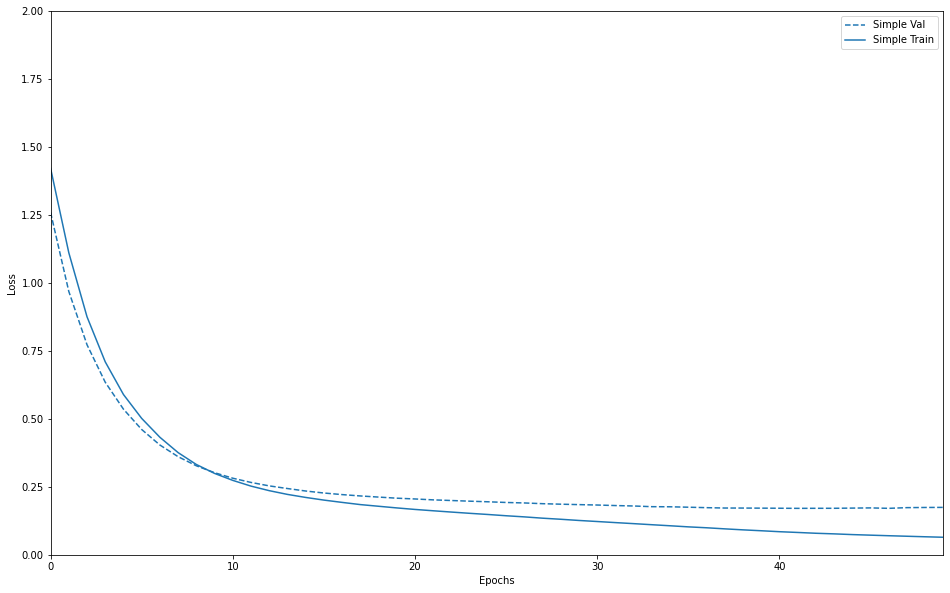

In [34]:
import matplotlib.pyplot as plt


def plot_history(histories, key='loss'):
  plt.figure(figsize=(16,10))
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])
  plt.ylim([0,2])

plot_history([('simple', s_history)])

  

### Predictions

In [35]:
trainpreds = simplemodel.predict_on_batch(X_train)
print(trainpreds)

[[9.99998093e-01 1.95623807e-06 1.74732850e-08 4.73063650e-08]
 [9.99200881e-01 3.02836328e-04 3.59412079e-04 1.36996037e-04]
 [9.75647092e-01 2.17637438e-02 1.39559130e-03 1.19350199e-03]
 ...
 [2.43528537e-03 5.87493777e-01 3.49858344e-01 6.02125786e-02]
 [9.98814702e-01 1.00525643e-03 6.66025007e-05 1.13503396e-04]
 [9.99775469e-01 1.32346686e-04 5.06953875e-05 4.15648246e-05]]


In [ ]:
valpreds = simplemodel.predict_on_batch(X_test)
print(valpreds)

<BarContainer object of 32 artists>

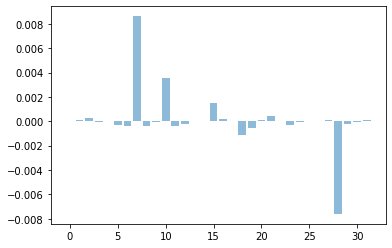

In [44]:
# Plot Weights
#nfw = simplemodel.get_weights()[0][0]
nfw = l1_model.get_weights()[0][0]
y_pos = np.arange(len(nfw))
 
plt.bar(y_pos, nfw, align='center', alpha=0.5)

### Regularized Model

In [45]:
l1_model = keras.Sequential([
    keras.layers.Dense(32, use_bias=True, kernel_regularizer=keras.regularizers.l2(0.01),activation=tf.nn.relu,
                       input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(32, use_bias=True,kernel_regularizer=keras.regularizers.l2(0.01), activation=tf.nn.relu),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(32, use_bias=True,kernel_regularizer=keras.regularizers.l2(0.01), activation=tf.nn.relu),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(16,kernel_regularizer=keras.regularizers.l2(0.01), activation=tf.nn.relu),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(4, activation=tf.nn.softmax)
  ])

l1_model.compile(loss=keras.losses.CategoricalCrossentropy(),
                optimizer="adam",
                metrics=['accuracy'])

In [46]:
l1_history = l1_model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data= (X_test, y_test))


Epoch 1/50
15/15 [==============================] - 1s 19ms/step - loss: 2.3870 - accuracy: 0.2096 - val_loss: 2.2328 - val_accuracy: 0.7583
Epoch 2/50
15/15 [==============================] - 0s 4ms/step - loss: 2.1217 - accuracy: 0.6730 - val_loss: 1.9622 - val_accuracy: 0.8917
Epoch 3/50
15/15 [==============================] - 0s 4ms/step - loss: 1.8409 - accuracy: 0.8637 - val_loss: 1.6238 - val_accuracy: 0.8833
Epoch 4/50
15/15 [==============================] - 0s 5ms/step - loss: 1.5157 - accuracy: 0.8805 - val_loss: 1.3330 - val_accuracy: 0.8833
Epoch 5/50
15/15 [==============================] - 0s 5ms/step - loss: 1.3509 - accuracy: 0.8805 - val_loss: 1.1956 - val_accuracy: 0.8833
Epoch 6/50
15/15 [==============================] - 0s 4ms/step - loss: 1.2338 - accuracy: 0.8805 - val_loss: 1.1083 - val_accuracy: 0.8833
Epoch 7/50
15/15 [==============================] - 0s 5ms/step - loss: 1.1514 - accuracy: 0.8805 - val_loss: 1.0374 - val_accuracy: 0.8833
Epoch 8/50
15/15 [=

In [47]:
print(max(l1_history.history['val_accuracy']))

0.925000011920929


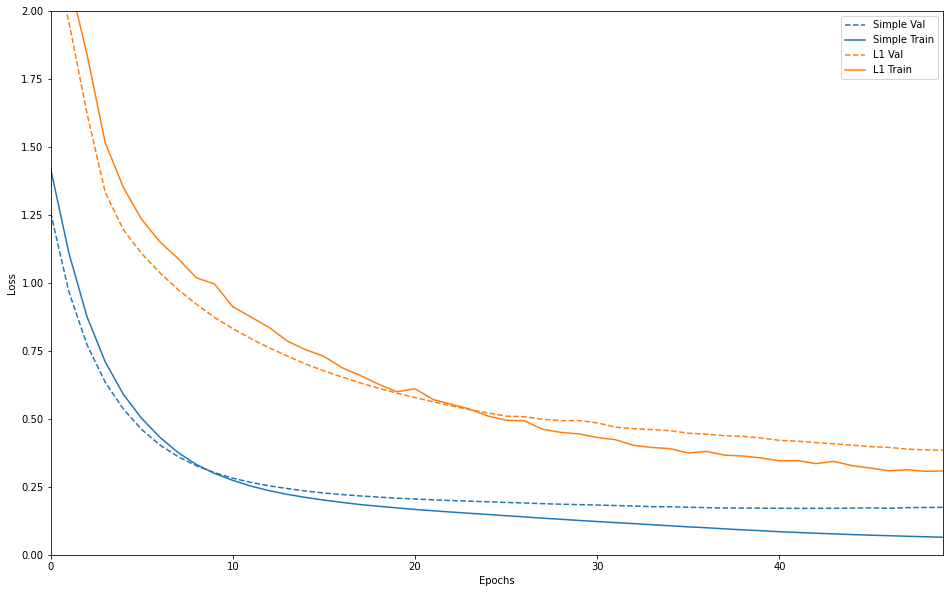

In [48]:
# Plot history Multiple
plot_history([('Simple', s_history),
              ('L1', l1_history)])

##Alternative Model

In [61]:
from keras.callbacks import EarlyStopping

early_stopping_monitor = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=20,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)

In [50]:
l2_model = keras.Sequential([
    keras.layers.Dense(32, use_bias=True, activation=tf.nn.relu,
                       input_shape=(X_train.shape[1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(32, use_bias=True, activation=tf.nn.relu),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(16, use_bias=True, activation=tf.nn.relu),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(16, use_bias=True, activation=tf.nn.relu),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(8, activation=tf.nn.relu),
    keras.layers.Dense(4, activation=tf.nn.sigmoid)
  ])

l2_model.compile(loss=keras.losses.BinaryCrossentropy(),
                optimizer="adam",
                metrics=['accuracy'])


In [62]:
classweights = {0: 1.,
                1: 10.,
                2: 10.,
                3: 10.}
l2_history = l2_model.fit(X_train, y_train, epochs=EPOCHS, class_weight=classweights,
                    validation_data= (X_test, y_test), callbacks=[early_stopping_monitor], verbose=1)

Epoch 1/50
15/15 [==============================] - 0s 10ms/step - loss: 0.9159 - accuracy: 0.9036 - val_loss: 0.1171 - val_accuracy: 0.9333
Epoch 2/50
15/15 [==============================] - 0s 5ms/step - loss: 0.9687 - accuracy: 0.8910 - val_loss: 0.1220 - val_accuracy: 0.9333
Epoch 3/50
15/15 [==============================] - 0s 6ms/step - loss: 0.8166 - accuracy: 0.8952 - val_loss: 0.1252 - val_accuracy: 0.9333
Epoch 4/50
15/15 [==============================] - 0s 7ms/step - loss: 0.9215 - accuracy: 0.8910 - val_loss: 0.1335 - val_accuracy: 0.9417
Epoch 5/50
15/15 [==============================] - 0s 6ms/step - loss: 0.8347 - accuracy: 0.8910 - val_loss: 0.1406 - val_accuracy: 0.9417
Epoch 6/50
15/15 [==============================] - 0s 8ms/step - loss: 0.7258 - accuracy: 0.9119 - val_loss: 0.1497 - val_accuracy: 0.9333
Epoch 7/50
15/15 [==============================] - 0s 5ms/step - loss: 0.8725 - accuracy: 0.8805 - val_loss: 0.1541 - val_accuracy: 0.9417
Epoch 8/50
15/15 [=

In [63]:
print(max(l2_history.history['val_accuracy']))

0.9416666626930237


In [53]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
#y_true = y_test.columns.get_loc(y_test.idxmax(1)

def get_classidx(row):
     for c in y_test.columns:
         if row[c]==1:
             return y_test.columns.get_loc(c)

y_true = y_test.apply(get_classidx, axis=1)




In [64]:
y_pred = np.argmax(l2_model.predict(X_test), axis=1)
target_names = ['class 1', 'class 2', 'class 3', 'class 4']

In [65]:
print(classification_report(y_true, y_pred, target_names=target_names))


              precision    recall  f1-score   support

     class 1       0.98      0.99      0.99       106
     class 2       0.50      0.75      0.60         4
     class 3       0.00      0.00      0.00         4
     class 4       0.57      0.67      0.62         6

    accuracy                           0.93       120
   macro avg       0.51      0.60      0.55       120
weighted avg       0.91      0.93      0.92       120



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
print(confusion_matrix(y_true, y_pred))

[[105   1   0   0]
 [  1   3   0   0]
 [  0   1   0   3]
 [  1   1   0   4]]


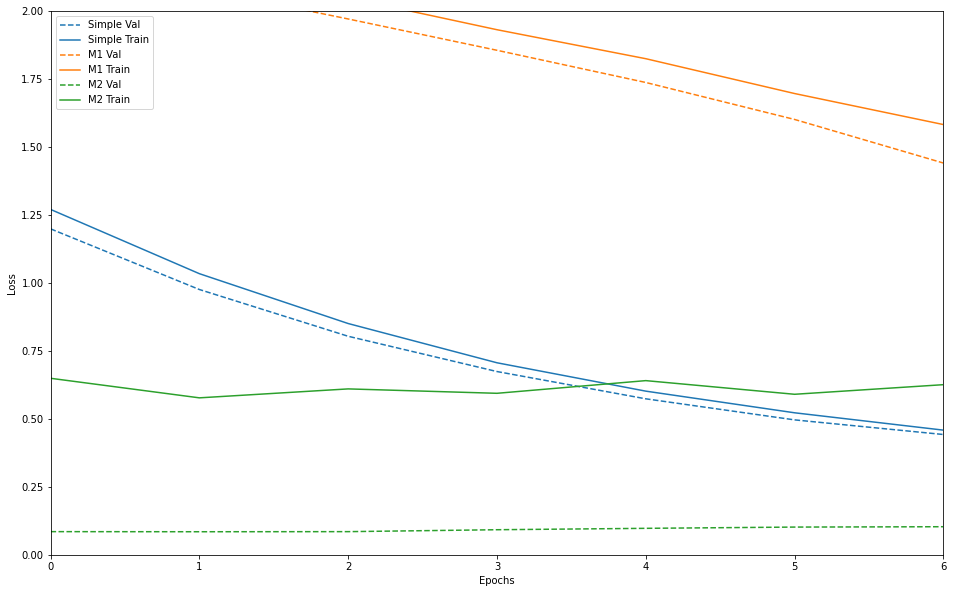

In [ ]:
plot_history([('Simple', s_history),
              ('M1', l1_history),
              ('M2', l2_history)])

In [ ]:
plot_history([('M2', l2_history)])